<h1 style="color:rgb(0,120,170)">Assignment 4: PCA and Kernel PCA</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Theoretical aspects concerning PCA</h2>

Our aim is to discuss a certain aspect of the mathematical derivation of PCA, that has not been adressed in full detail in the lectures. We use the same notation as in the lecture, i.e. we are given a data matrix $\mathbf{X}= ( \mathbf{x}_1,...,\mathbf{x}_n )^\top$, where each $\mathbf{x}_i \in \mathbb{R}^m$ for $1\le i \le n$. 

A main reason, why PCA works very well, is the fact that the covariance matrix, defined as $\mathbf{C}=\frac 1n \mathbf{X}^T\mathbf{X}$, or equivalently, $c_{st}=\frac1n \sum_{i=1}^n x_{is} x_{it}$, is positive semi-definite. 
* Show this fact by proving $\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle= \sum_{s,t=1}^m a_s a_t c_{st} \geq 0$ for any $\mathbf{a} \in \mathbb{R}^m$. 
* Moreover, show that positive semi-definiteness of $\mathbf{C}$ implies that all eigenvalues are non-negative. 
* Why is this an important fact in PCA? 

<h3 style="color:rgb(210,90,80)">Exercise 1 (20 points):</h3>

########## YOUR SOLUTION HERE ##########

\begin{align}
\\\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle &= \sum_{s,t=1}^m a_s a_t c_{st} \\
&=  \frac1n \sum_{s,t=1}^m a_s a_t \sum_{i=1}^n x_{is} x_{it} \\ 
&=  \frac1n \sum_{i=1}^n \sum_{s=1}^m a_s x_{is} \sum_{t=1}^m a_t   x_{it}  \\ 
&=  \frac1n \sum_{i=1}^n \sum_{s=1}^m a_s x_{is} \sum_{s=1}^m a_s   x_{is}  \\
&=  \frac1n \sum_{i=1}^n \left(\sum_{s=1}^m a_s x_{is}\right)^2  \geq 0\\
\\
\\
\end{align}


\begin{align}
\text{psd:} \qquad v^T C v ≥ 0 \\
\text{eigenvector v of C, eigenvalue λ:} \qquad Cv = λv\\
v^T C v &\geq 0 \\
v^T \lambda v &\geq 0\\
\lambda v^T v &\geq 0\\
\lambda ||v||^2 &\geq 0 \\
\lambda  &\geq 0 
\\
\end{align}

It's important because PCA decomposes data in terms of variance, which has to be positive.

<h2 style="color:rgb(0,120,170)">PCA applied to real world data set</h2>

We use the provided data set faces94.csv which is essentially based
on the pictures from the collection of Facial Images 1. This data set consists of $45 \times 50$
gray scale pixel images.
Let us first read in the data and plot the first image as an example.
This exercise should give you a feeling of what it really means to preserve variance.

In [1]:
#read data. Nothing to do here
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline 

# import data from csv file,
data = np.genfromtxt('faces94.csv', delimiter=',')

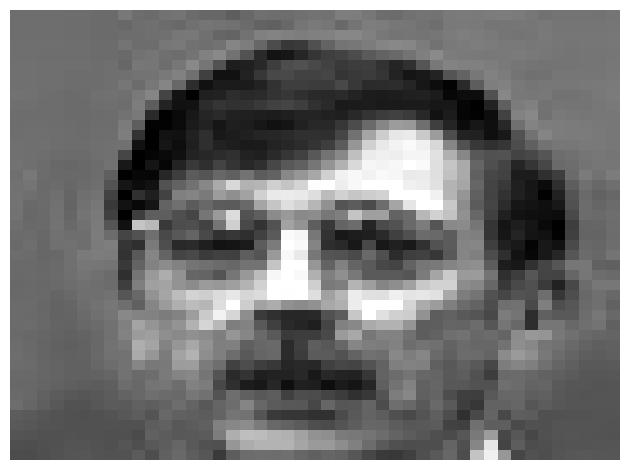

In [2]:
#plot first image as an example. Nothing to do here
def plotImg(x):
    fig, ax = plt.subplots()
    ax.pcolor(x.reshape(45, 50).T, cmap=cm.gray)
    ax.set_ylim([45, 0])
    ax.axis("off")
    fig.tight_layout()
    
# plot first img
plotImg(data[0, :])

<h3 style="color:rgb(210,90,80)">Exercise 2 (10 points):</h3>

We next use PCA for data-compression. Downproject the data using enough PCs to
explain $50 \% $, $75 \% $ and $99 \% $ of the variance. To do this use the sklearn-package. Print the number of principal components needed and also the explained variance for each of the tasks. 

In [3]:
########## YOUR SOLUTION HERE ##########

pca = PCA()
pca.fit(data)

expl_var_list = [0.5, 0.75, 0.99]
c_needed = []
cum_var = np.cumsum(pca.explained_variance_ratio_) #(eigenvalues/sum(eigenvalues)
# to find out after adding which element in the eigenvalue matrix (variance along the related PCA), we reach the desired level of variance

for var in expl_var_list:
    for i in range(len(cum_var)):
        if cum_var[i]>var:
            print(f'Explainded variance: {cum_var[i]}, approx. {var},\n principal components needed: {i+1}')
            c_needed.append(i+1)
            break

pca_50 = PCA(n_components=c_needed[0]).fit(data)
pca_75 = PCA(n_components=c_needed[1]).fit(data)
pca_99 = PCA(n_components=c_needed[2]).fit(data)

Explainded variance: 0.5141740887481955, approx. 0.5,
 principal components needed: 4
Explainded variance: 0.7562183511176107, approx. 0.75,
 principal components needed: 18
Explainded variance: 0.9900368370506817, approx. 0.99,
 principal components needed: 367


<h3 style="color:rgb(0,120,170)">Exercise 3 (10 points):</h3>

You have essentially compressed vectors of dimension $d = 2250$ into vectors of much smaller dimension. Implement a function, that decompresses the data again, i.e. reconstruct the $2250$ dimensional data points, given the lower-dimensional representation. Print the dimension of the back-transformed data and the back-transformed data itself to check, if your result is indeed correct. 

In [4]:
########## YOUR SOLUTION HERE ##########
print(f'Orginal dimensions: \n     {data.shape}') # X

# Y = X W <=> X = Y W.T

Y_50 = pca_50.transform(data) 
Y_75 = pca_75.transform(data)
Y_99 = pca_99.transform(data)

W_50 = pca_50.components_
W_75 = pca_75.components_
W_99 = pca_99.components_

print(f'Dimensions after pca: \n 50: {Y_50.shape} \n 75: {Y_75.shape} \n 99: {Y_99.shape}')

X_50_decomp = Y_50@W_50 + pca_50.mean_ # pca.inverse_transform(Y)
X_75_decomp = Y_75@W_75 + pca_75.mean_
X_99_decomp = Y_99@W_99 + pca_99.mean_

print(f'Dimensions after reconstruction: \n 50: {X_50_decomp.shape} \n 75: {X_75_decomp.shape} \n 99: {X_99_decomp.shape}')

assert np.array_equal(X_50_decomp, pca_50.inverse_transform(Y_50))
assert np.array_equal(X_75_decomp, pca_75.inverse_transform(Y_75))
assert np.array_equal(X_99_decomp, pca_99.inverse_transform(Y_99))

Orginal dimensions: 
     (3059, 2250)
Dimensions after pca: 
 50: (3059, 4) 
 75: (3059, 18) 
 99: (3059, 367)
Dimensions after reconstruction: 
 50: (3059, 2250) 
 75: (3059, 2250) 
 99: (3059, 2250)


<h3 style="color:rgb(210,90,80)">Exercise 4 (15 points):</h3>

Plot a few of the images and their reconstructions with $50 \% $, $75 \% $ and $99 \% $ of the variance.

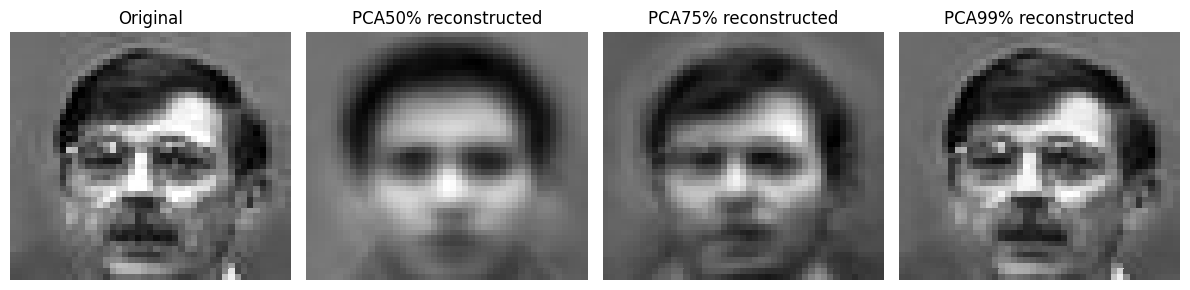

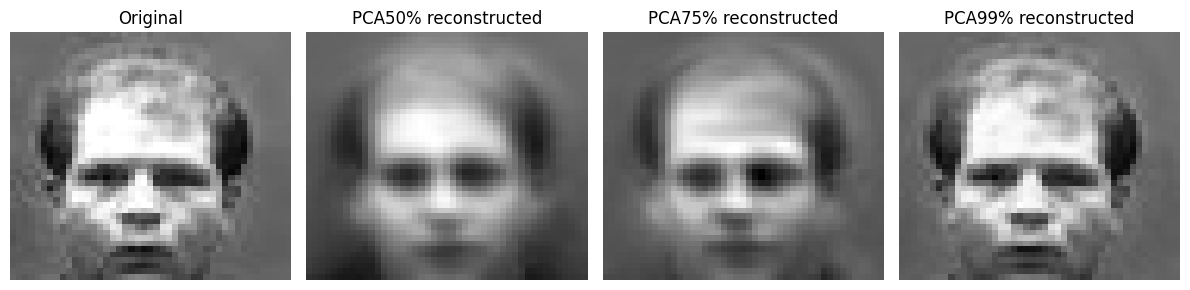

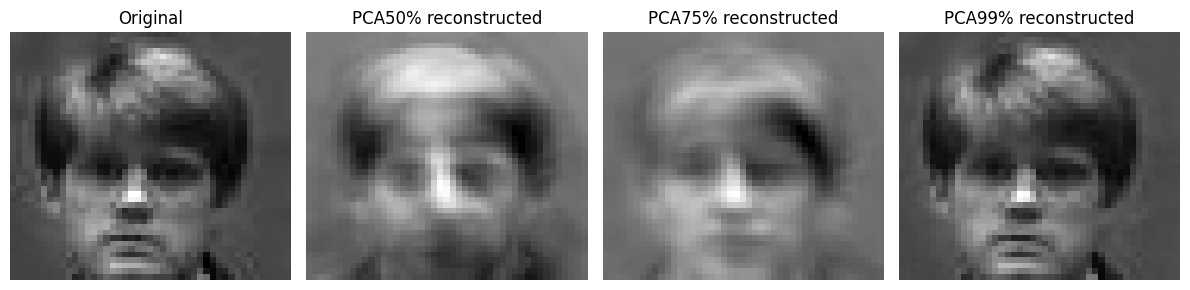

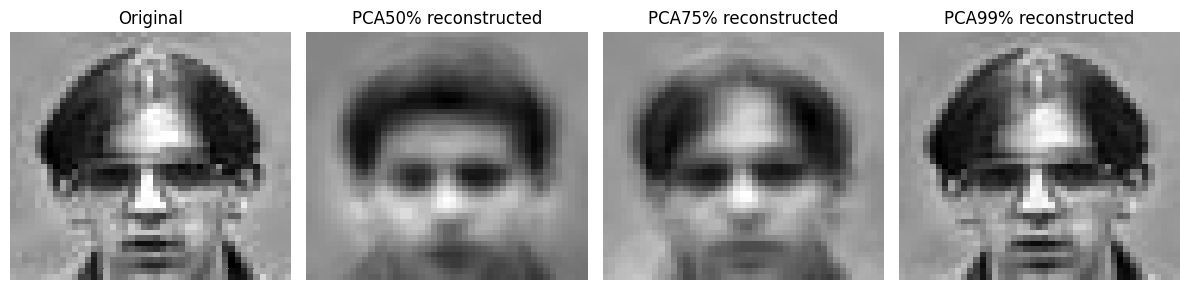

In [5]:
########## YOUR SOLUTION HERE ##########

def plotImg_rec(i):
    fig, axes = plt.subplots(1,4, figsize=(12,3))
    imgs = [data[i, :], X_50_decomp[i, :], X_75_decomp[i, :], X_99_decomp[i, :]]
    labels = ['Original', 'PCA50% reconstructed', 'PCA75% reconstructed', 'PCA99% reconstructed']
    
    for ax,img,label in zip(axes, imgs, labels):
        ax.pcolor(img.reshape(45, 50).T, cmap=cm.gray)
        ax.set_ylim([45, 0])
        ax.axis("off")
        ax.set_title(label)                    
        fig.tight_layout()
    
plotImg_rec(0)
plotImg_rec(172)
plotImg_rec(1536)
plotImg_rec(2689)

<h3 style="color:rgb(210,90,80)">Exercise 5 (5 points):</h3>

Comment on your observations. What type of information is preserved using the 3 different compression rates, what is lost?

########## YOUR SOLUTION HERE ##########

50% compression leaves the faces very blurry, we can't see any defining characteristics, but the generic face-shape is preserved via the light and shadows.

75% compression shows more recognizable characteristics, the people are somewhat recognizable, preserves more specific face shapes and characteristic features, features are better flushed out.

99% compression is almost identical to the original images, preserves the details. 

<h2 style="color:rgb(0,120,170)">PCA vs. Kernel PCA</h2>

Consider the two-dimensional data sets pca3.csv and pca4.csv
(the latter data set has as a third column as label, which should be used for coloring
the plots). First let us read the data, and for pca4 we additionally separate label from date:

In [6]:
#Read data. Nothing to do here!
data3 = np.genfromtxt('pca3.csv', delimiter = ',', skip_header = 0) 
data4 = np.genfromtxt('pca4.csv', delimiter = ',', skip_header = 0)

<h3 style="color:rgb(0,120,170)">Exercise 6 (10 Points):</h3>

* Perform PCA for data3 and data4, visualize the principal components together with the data and
determine the proportion of variance for each of the components.

explained variance ratio pc1: 0.5932170026500673
explained variance ratio pc2: 0.4067829973499326


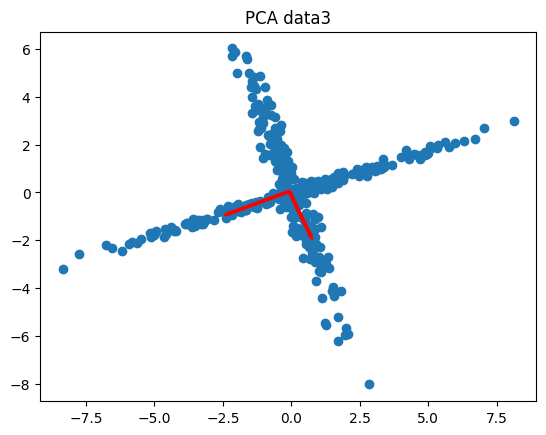

explained variance ratio pc1: 0.544693580541503
explained variance ratio pc2: 0.455306419458497


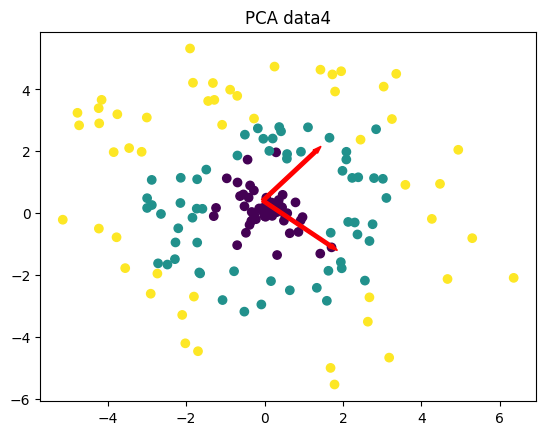

In [7]:
########## YOUR SOLUTION HERE ##########

pca3 = PCA().fit(data3)
pca4 = PCA().fit(data4[:,:2])


def plot_pca(data, pca, labels, title):
    plt.figure()

    xs = data[:,0]
    ys = data[:,1]
    
    if labels is not None:
        plt.scatter(x=xs, y=ys, c=labels)
    else:
        plt.scatter(x=xs, y=ys)
        
    x, y = np.mean(data, axis=0)
    n = pca.components_.shape[0]    
    for i in range(n): # for each pc
        a = pca.components_[i]*np.sqrt((pca.explained_variance_[i])) # 2 orthogonal unit vectors, one along pc1, other along pc2, scaled by sd
        plt.arrow(x,y, a[0], a[1], head_width=0.15,color='red',width=0.1)
        print(f"explained variance ratio pc{i+1}:", pca.explained_variance_ratio_[i])


    plt.title(title)
    plt.show()
    
plot_pca(data3, pca3, None, "PCA data3")
plot_pca(data4[:, :2], pca4, data4[:,2], "PCA data4")


<h3 style="color:rgb(0,120,170)">Exercise 7 (20 points):</h3>

* Perform Kernel PCA on both datasets. Try polynomial and RBF-kernels. For polynomial kernel use at least the parameters $\gamma=2$ and degree $3$, for RBF $\gamma=0.25$. You are of course allowed (and encourgaged) to try more different parameters and also different kernels to get a better feeling.

* Also visualize the projected data together with the original ones. 

* Finally, visualize the projection onto the first principal component in the RBF-kernel plots for data4 (can also be done together in one plot). This should also convince you about the fact that the first PC already contains a huge part of the information of the data, e.g. the data can already be well separated by the first PC. 

<Figure size 640x480 with 0 Axes>

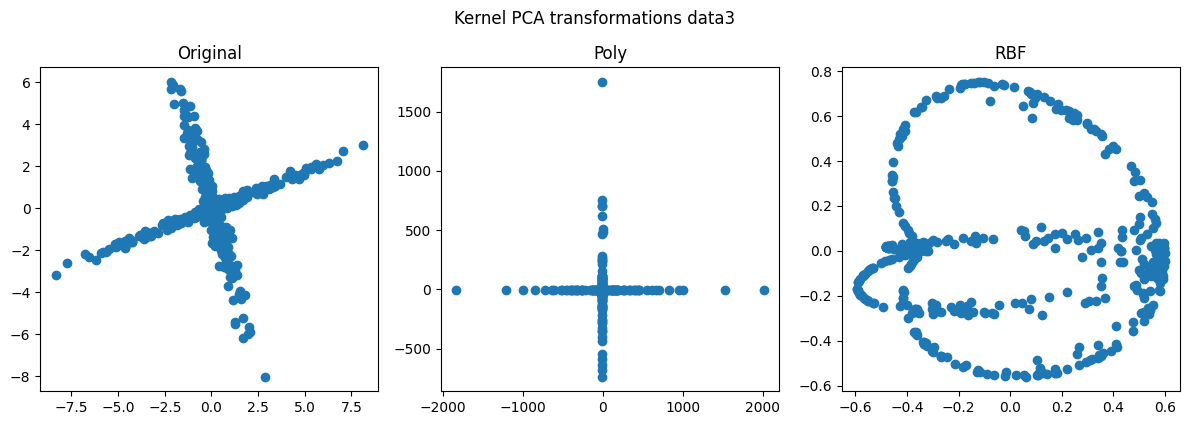

<Figure size 640x480 with 0 Axes>

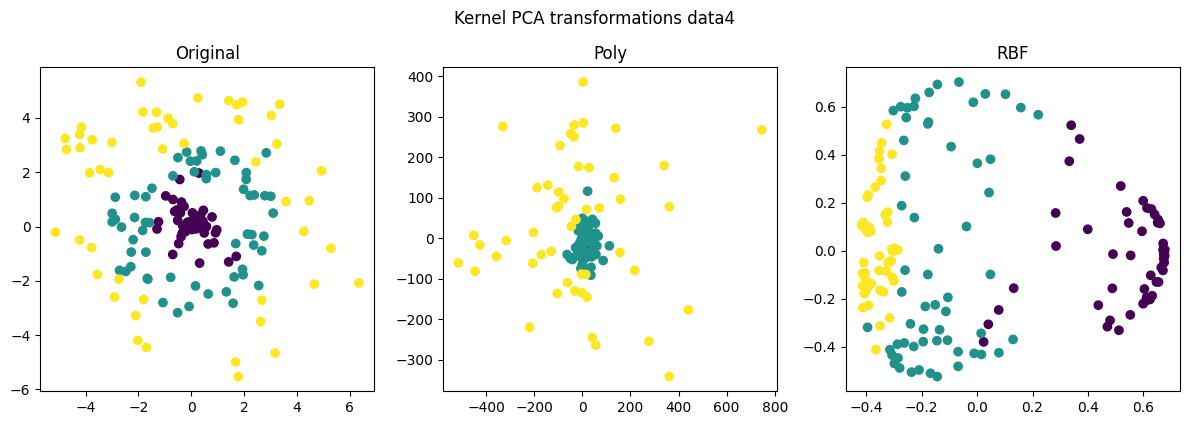

In [8]:
########## YOUR SOLUTION HERE ##########
kpca3_poly = KernelPCA(kernel='poly', gamma=2, degree=3).fit(data3)
kpca4_poly = KernelPCA(kernel='poly', gamma=2, degree=3).fit(data4[:,:2])
kpca3_rbf = KernelPCA(kernel='rbf', gamma=0.25).fit(data3)
kpca4_rbf = KernelPCA(kernel='rbf', gamma=0.25).fit(data4[:,:2])

Y_kpca3_poly = kpca3_poly.transform(data3) 
Y_kpca4_poly = kpca4_poly.transform(data4[:,:2]) 
Y_kpca3_rbf = kpca3_rbf.transform(data3) 
Y_kpca4_rbf = kpca4_rbf.transform(data4[:,:2]) 

def plot_kpca(data, labels, gtitle):
    plt.figure()

    fig, axes = plt.subplots(1,3, figsize=(12,4))
    titles = ['Original', 'Poly', 'RBF']
    
    for ax,trans_data,title in zip(axes, data, titles):
        xs = trans_data[:,0]
        ys = trans_data[:,1]
        if labels is not None:
            ax.scatter(x=xs, y=ys, c=labels)
        else:
            ax.scatter(x=xs, y=ys)
        
        ax.set_title(title)                    
        fig.tight_layout()
        

    fig.suptitle(gtitle, y=1.05)
    plt.show()
    
_3plot = [data3,Y_kpca3_poly, Y_kpca3_rbf]
_4plot = [data4[:,:2],Y_kpca4_poly, Y_kpca4_rbf]

plot_kpca(_3plot, None, "Kernel PCA transformations data3")
plot_kpca(_4plot, data4[:,2], "Kernel PCA transformations data4")


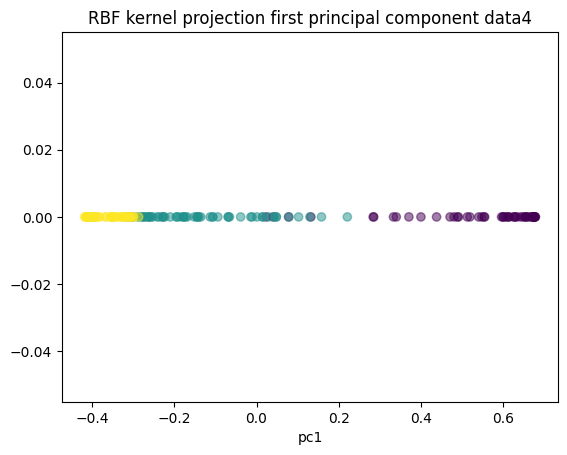

In [9]:
pc1_kpca4_rbf = Y_kpca4_rbf[:, 0]

plt.figure()
plt.scatter(pc1_kpca4_rbf, np.zeros_like(pc1_kpca4_rbf), c=data4[:, 2], alpha=0.5)
plt.xlabel("pc1")
plt.title("RBF kernel projection first principal component data4")
plt.show()


<h3 style="color:rgb(0,120,170)">Exercise 8 (10 points):</h3>

Can you observe advantages/disadvantages of Kernel PCA compared to PCA without
using a kernel? For which kind of data do you observe them?


########## YOUR SOLUTION HERE ##########

Kernel PCA is used for data which is not linearly separable, so we map it to a higher dimension, where it hopefully becomes separable. Regular PCA would just rotate and rescale data, so it's good for purely linear relationships.

In data4, which has a radial relationship, transformed data is separable along the first component with the Gaussian kernel, while the poly attempts to simplify the polynomial curves of the data, which doesn't work, since the data is spread around the center (on circles, not on a curve), and linear would just rotate and scale the data, which wouldn't help.

For data3, which has a linear structure already, the poly kernel simplifies the variance, and collapses it to a line around the origin, while the RBF projects it to a higher dimension, which overcomplicates the relationship.
